In [1]:
import cv2
import helpers 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [3]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Shape: (700, 1280, 3)
Label: day


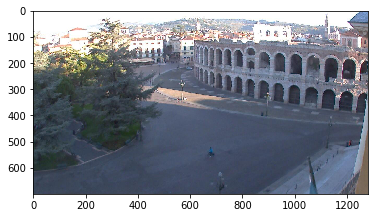

In [6]:
# visualize the input image
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))

In [11]:
# preprocess the data
def standardize_input(image):
    standard_im=cv2.resize(image,(1100,600))
    return standard_im



In [12]:
def encode(label):
    numerical_val=0
    if(label == 'day'):
        numerical_val = 1
    return numerical_val

In [13]:
def standardize(image_list):
    standard_list =[]
    for item in image_list:
        image = item[0]
        label = item[1]
        standardized_im = standardize_input(image)
        binary_label = encode(label)
        standard_list.append((standardized_im,binary_label))
    return standard_list

STANDARDIZED_LIST = standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


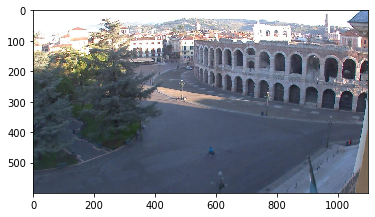

In [14]:
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

label:1


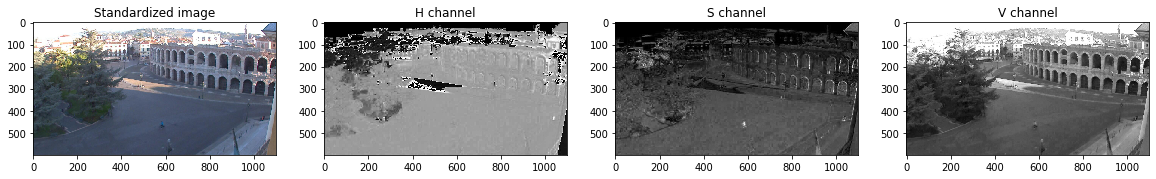

In [16]:
#feature extraction
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

hsv = cv2.cvtColor(test_im,cv2.COLOR_RGB2HSV)
print('label:'+str(test_label))

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [17]:
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0
    avg=sum_brightness/area
    return avg

Avg brightness: 119.6223


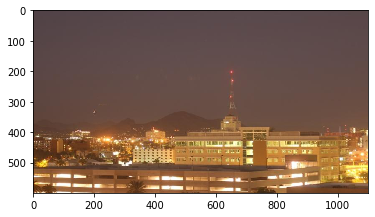

In [18]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

In [19]:
#classification
def estimate_label(rgb_image):
    predicted_label = 0
    if (avg_brightness(rgb_image) >100):
        predicted_label =1
    return predicted_label

In [ ]:
#testing classifier
